# Digital Marketing Strategy & Targeting

### What do we want to achieve ?

* In this series of notebooks, we are going to look at current Digital Media Strategies adopted by organizations from different industries. To do so, We develop a new Business case and understand how we can leverage Data Science techniques to create, develop and engage with our Customer base. Below is the Marketing Data Science Cycle, which guides our new Business to take prioritied steps, as the Business grows.


### Marketing Data Science Cycle


* First, we explore <b>Open source datasets and APIs to obtain Demographic data, to make an informed decision about our potential customer market.</b> If market data is available, we can gain insights about how our competitiors perform in terms of either <b>sales, product, pricing, promotion and other growth metrics.</b>


* Once we collect and store data, and as we gain new customers, we can start segmenting them to better understand their behavioural patterns, to cater to every segment. <b>Do we have a lot of loyal customers ? If so, do we need to provide them better offers or services to retain them ? Do we have a lot of customers that we fail to retain ? If so, is it due to product quality or lack of branding ?</b> We use Recency-Frequency-Monetary Model, calculate Lifetime Value for customers and look at other Clustering techniques, and dive deep into our data to make assumptions about different channels or content to showcase to these segments.


* <b>To validate our assumptions, release new products/ versions, and maintain + build our brand/ product, we need to continuously Test, Optimize and re-assign customers to different segments using A/B tests, Multiarm bandits and other statistical methods to keep the Business growing.</b>



* As our market share grows, and we gain new customers, we need to understand their value, which segment does the customer fall into ? We look at various cases where companies pay big bucks to retain loyal <b>customers. For subscription based services, churn models are extremely crucial to financial success. Survival Analysis Models are extremely useful to understand customer behaviour.</b>


* Along the cycle, we need to capture data, store it efficiently, recognize and analyze financial, sales, market and website metrics, store modeling/ cluster results and expose them to <b>interpretable dashboards to take informed decisions.</b> We will go through multiple E-Commerce open datasets to understand all the mentioned concepts in the Data Science Marketing Cycle below.

![alt text](dscycle1.jpeg "Data Science Cycle")

<hr>

# Intro to Marketing Strategy: Demographic Data

###### Summary:
In this notebook, we take a simple Business case and see how open datasets can aid in recognizing where our potential customer target could exist. We take a deeper look at Clustering techniques and evaluation metrics to wrap up potential demographic targets.


###### Index:
1) [Business Case (Gymshark Fitness Clothing Retail Website)](#1)

2) [What does our Potential Customer look like ?](#2)

3) [Zipcode Analysis across factors](#3)

###### Clustering Techniques:

* [K-Means](#4)


* [DBSCAN](#5)


* [Silhouette Metric](#6)


* [Hierarchical Clustering](#7)


* [Log-Loss & EM Algorithm](#8)


* [Gaussian Mixture Model](#9)


4) [Applying different Algorithms to our Dataset](#11)


5) [Conclusion](#12)

<a id='1'></a>
## Recognize Potential Customers 

* Before we start this exercise, we need to understand that each Business has very different Customer base. For example: Gymshark is an up and coming online fitness retail store, whose main customer base are gym goers, esentially targeting fitness circles.


* Their primary target in terms of demographics are millennials, spread across major countries. As they have no stores, social media marketing has been their highest priority; and sponsor Fitness Influencers on YouTube and Instagram (https://www.retail-insight-network.com/comment/gymshark-prime-example-millennial-marketing-done-right/), essentially ditching older marketing techniques and adopted sponsor-driven Ads for better reach. 


* Each of these influencers have massive Social media following and just plug-in Social Media pages/ Accounts of the brand and heavily promote them in their content. Let's look at how we can start a similar online Business; and answer our first set of questions: 

## What does our Customer look like ? Where are they located ? 

* First, we explore open demographic datasets to understand demographics in the U.S. Our primary dataset we analyze is probably the most useful mapping table, which includes mapping from <strong> State -> DMA -> County -> ZipCode </strong>

Demographic Lookup Data Source: https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/IVXEHT/DBOGRS&version=7.4

In [1]:
# importing necessary libraries
from IPython.display import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# reading demographic lookup table
df_lookup_demographic = pd.read_csv('DataSets/USA_Demographic_Lookup.csv')

# number of rows, columns
df_lookup_demographic.shape

(41535, 6)

In [2]:
# Each row corresponds to mapping between FIPs Code, COUNTY, ST, DMA CODE and ZIPCODE (primary key: ZIPCODE)

df_lookup_demographic.head()

,FIPS,COUNTY,ST,DMA CODE,DMA NAME,ZIPCODE
0,1001,Autauga,AL,698,MONTGOMERY,36003
1,1001,Autauga,AL,698,MONTGOMERY,36006
2,1001,Autauga,AL,698,MONTGOMERY,36008
3,1001,Autauga,AL,698,MONTGOMERY,36051
4,1001,Autauga,AL,698,MONTGOMERY,36066


## Demographic Exploration 

* Before we start rolling up, we need to understand how many of these demographic types exist, and answer basic questions such as find states with most counties, most zipcodes and so on.


* DMA stands for Designated Market Area (210 unique DMAs in the US), which are combination of multiple counties.

In [3]:
# There are 51 Unique States in our lookup dataset

len(df_lookup_demographic.ST.unique()), df_lookup_demographic.ST.unique()

(51, array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
        'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'OH', 'LA', 'ME', 'MD',
        'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM',
        'NY', 'NC', 'ND', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object))

In [4]:
# 210 unique DMAs & 41535 unique zipcodes

len(df_lookup_demographic['DMA NAME'].unique()), len(df_lookup_demographic['ZIPCODE'].unique())

(210, 41535)

### States with most # of ZipCodes 

In [5]:
df_lookup_demographic.groupby('ST').count()[['ZIPCODE']].sort_values('ZIPCODE',ascending=False).head()

,ZIPCODE
ST,
CA,2658
TX,2647
NY,2205
PA,2204
IL,1587


### DMAs with most # of ZipCodes 

In [6]:
df_lookup_demographic.groupby('DMA NAME').count()[['ZIPCODE']].sort_values('ZIPCODE',ascending=False).head()

,ZIPCODE
DMA NAME,
NEW YORK,1500
"WASHINGTON, DC-HAGRSTWN",957
LOS ANGELES,956
PHILADELPHIA,776
BOSTON,716


## State vs DMA vs Zipcode vs Street Address

* Intuitively, our first best estimate would be to target States with most # of zipcodes, or even DMAs with most # of zipcodes. However, we can optimize much more if we move our <b>target towards more granularity, rather than targeting the general audience. </b>


* With most Ad Media platforms having an option to target with specific zipcodes (In few cases, even targeting by street addresses), let us consider why targeting zipcodes would be a better option.

## Generality vs Specificity Tradeoff

* To understand why targeting at zipcode level is better in most cases, we need to understand that the populatin distributions are extremely skewed for each zipcode/ DMA. There are zipcodes with 1-10 people (http://localistica.com/usa/zipcodes/least-populated-zipcodes/) upto 100,000 + population (http://localistica.com/usa/zipcodes/most-populated-zipcodes/)


* Say we have a budget of 100,000 USD  for the first two months to spend on digital marketing, and need to run campaigns for both the months. We may be able to run Ads for a limited number of impressions (across all demographics we want to cover) before we run out of budget to display our Ad ! In this case, we would want to be as specific as possible, and target our main focus zipcodes, than target the entire DMA or even State.


* If budget allows for a much wider media campaign, we can keep increasing the list of zipcodes, or even roll-up to DMA level. Generally speaking, most of the use cases in todays market is to use zipcode as the standard demographic unit.

<a id='2'></a>

## What does our Potential Customer look like ?

* In our potential customer attributes, we know we are going to look for <b>gym-going millenialls. We also know we want to target 'high-value' zipcodes initially (Better bang for buck), Hence, target zipcodes with Higher population or higher population density. </b>


* We want to target both genders (based on what products we choose to sell), It would be good to have information about number of gyms in a zipcode, which could help us further focus on creating our target demographic.


* Other questions to think about: <b>Am I selling a high value luxury product ? If so, I can target only the highest income zipcodes. Am I selling my product to highly edcuated potential customers ? (Maybe an Astrophysics textbook) Does my customer have to be single or with a family ? (King size mattress vs single bed)</b>


* Lets look at Census data to answer at least few of the questions we have in mind. This is an excellent API to fetch demographic level information (at zipcode level, which can be rolled back by using our demographic lookup table).

Source: https://uszipcode.readthedocs.io/?badge=latest#data-points

In [7]:
# importing library
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=False)

# sample zipcode
zipcode = search.by_zipcode("10001")

# we have excellent information such as size of zipcode, land area, water area, 
# number of housing units, occupied units, median home value, median househols income and so on 

zipcode.to_dict().keys()

dict_keys(['zipcode_type', 'major_city', 'post_office_city', 'common_city_list', 'county', 'state', 'lat', 'lng', 'timezone', 'radius_in_miles', 'area_code_list', 'population', 'population_density', 'land_area_in_sqmi', 'water_area_in_sqmi', 'housing_units', 'occupied_housing_units', 'median_home_value', 'median_household_income', 'bounds_west', 'bounds_east', 'bounds_north', 'bounds_south', 'zipcode', 'polygon', 'population_by_year', 'population_by_age', 'population_by_gender', 'population_by_race', 'head_of_household_by_age', 'families_vs_singles', 'households_with_kids', 'children_by_age', 'housing_type', 'year_housing_was_built', 'housing_occupancy', 'vancancy_reason', 'owner_occupied_home_values', 'rental_properties_by_number_of_rooms', 'monthly_rent_including_utilities_studio_apt', 'monthly_rent_including_utilities_1_b', 'monthly_rent_including_utilities_2_b', 'monthly_rent_including_utilities_3plus_b', 'employment_status', 'average_household_income_over_time', 'household_income'

### What information does Census provide ?

* From the API, we get zipcode level education levels, median income, land and water area, monthly rent, employment status, median house value, income sources and other valuable information. Most of the general case questions can be answered using this data source to find where our potential customers could reside. For this case, I pulled in a few columns from the API and exported it to a file.

### Our best guess for where our Potential Customers resides

* We need millenialls who reside in highly populated areas, with gyms and sports facilities in their neighborhood, additionally, we could also target top 100 highest income zipcodes along with zipcodes with highest number of schools/ universities. 

In [8]:
df_census = pd.read_csv('DataSets/Book1CensusData.csv')

df_census.columns

Index(['zipcode', 'major_city', 'radius_in_miles', 'population',
       'population_density', 'housing_units', 'occupied_housing_units',
       'median_home_value', 'median_household_income'],
      dtype='object')

In [9]:
df_census.head(2)

,zipcode,major_city,radius_in_miles,population,population_density,housing_units,occupied_housing_units,median_home_value,median_household_income
0,60629,Chicago,2.0,113916,16726.0,34000,30114,159700.0,40650.0
1,79936,El Paso,6.0,111086,4154.0,35523,34452,121700.0,52024.0


In [10]:
# We can now merge this file with lookup data

df_merged = df_census.merge(df_lookup_demographic, left_on='zipcode', right_on='ZIPCODE')

df_merged = df_merged[['zipcode', 'major_city', 'COUNTY', 'DMA NAME', 'ST', 'population','radius_in_miles',
       'population_density', 'housing_units', 'occupied_housing_units',
       'median_home_value', 'median_household_income']]

df_merged.head(2)

,zipcode,major_city,COUNTY,DMA NAME,ST,population,radius_in_miles,population_density,housing_units,occupied_housing_units,median_home_value,median_household_income
0,60629,Chicago,Cook,CHICAGO,IL,113916,2.0,16726.0,34000,30114,159700.0,40650.0
1,79936,El Paso,El Paso,EL PASO,TX,111086,6.0,4154.0,35523,34452,121700.0,52024.0


* Before we go ahead with selecting necessary zipcodes with our preferences, let us cluster all zipcodes and see if there are distinct patterns in the data.


* We also conduct some exploratory analysis to see distributions for population, population density, income, home value and other variables to better understand the data

<a id='3'></a>

### ZipCode Analysis by various factors 

In [11]:
df_merged.head(2)

,zipcode,major_city,COUNTY,DMA NAME,ST,population,radius_in_miles,population_density,housing_units,occupied_housing_units,median_home_value,median_household_income
0,60629,Chicago,Cook,CHICAGO,IL,113916,2.0,16726.0,34000,30114,159700.0,40650.0
1,79936,El Paso,El Paso,EL PASO,TX,111086,6.0,4154.0,35523,34452,121700.0,52024.0


* Both population and population density are skewed distributions as expected. There are very few Zipcodes with extremely high population and population densities.

Text(0.5, 1.0, 'Population Density Distribution')

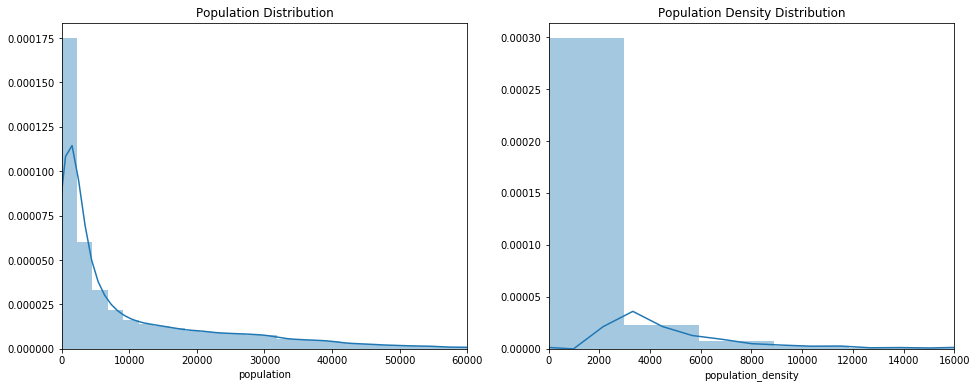

In [12]:
# Population Distributions
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
sns.distplot(df_merged.population)
plt.xlim(0,60000)
plt.title('Population Distribution')

plt.subplot(1, 2, 2)
sns.distplot(df_merged.population_density.fillna(0))
plt.xlim(0,16000)
plt.title('Population Density Distribution')

Text(0.5, 1.0, 'Median home value Distribution')

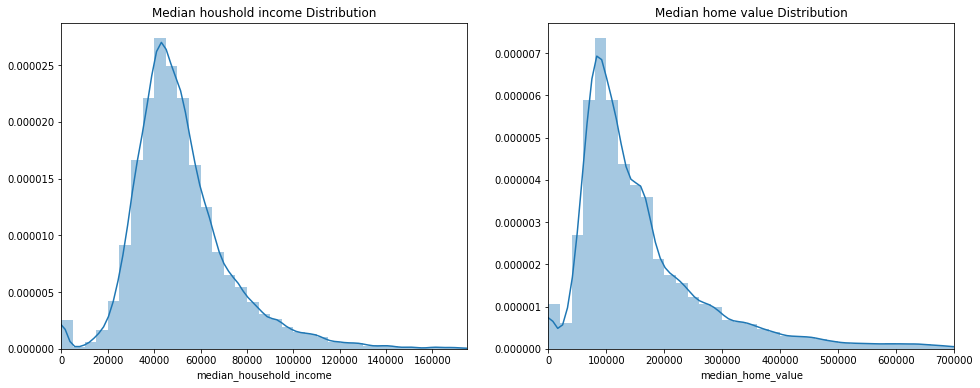

In [13]:
# Now we look at both median household income and median home value
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
sns.distplot(df_merged.median_household_income.fillna(0))
plt.xlim(0,175000)
plt.title('Median houshold income Distribution')

plt.subplot(1, 2, 2)
sns.distplot(df_merged.median_home_value.fillna(0))
plt.xlim(0,700000)
plt.title('Median home value Distribution')

In [14]:
# we create a new feature (ratio) of occupied unites to housing units within zipcode to get % occupied units
df_merged['percent_occupied_units'] = df_merged['occupied_housing_units']/df_merged['housing_units']

df_merged.dropna(inplace=True)

df_merged.head(2)

,zipcode,major_city,COUNTY,DMA NAME,ST,population,radius_in_miles,population_density,housing_units,occupied_housing_units,median_home_value,median_household_income,percent_occupied_units
0,60629,Chicago,Cook,CHICAGO,IL,113916,2.0,16726.0,34000,30114,159700.0,40650.0,0.885706
1,79936,El Paso,El Paso,EL PASO,TX,111086,6.0,4154.0,35523,34452,121700.0,52024.0,0.969851


### Correlations 

In [15]:
df_merged[['population','radius_in_miles', 'population_density', 'percent_occupied_units',
           'median_home_value','median_household_income']].corr()

,population,radius_in_miles,population_density,percent_occupied_units,median_home_value,median_household_income
population,1.000000,-0.139149,0.416193,0.328023,0.283049,0.156621
radius_in_miles,-0.139149,1.000000,-0.189183,-0.215054,-0.167579,-0.151414
population_density,0.416193,-0.189183,1.000000,0.127486,0.336943,0.074443
percent_occupied_units,0.328023,-0.215054,0.127486,1.000000,0.102436,0.263786
median_home_value,0.283049,-0.167579,0.336943,0.102436,1.000000,0.697087
median_household_income,0.156621,-0.151414,0.074443,0.263786,0.697087,1.000000


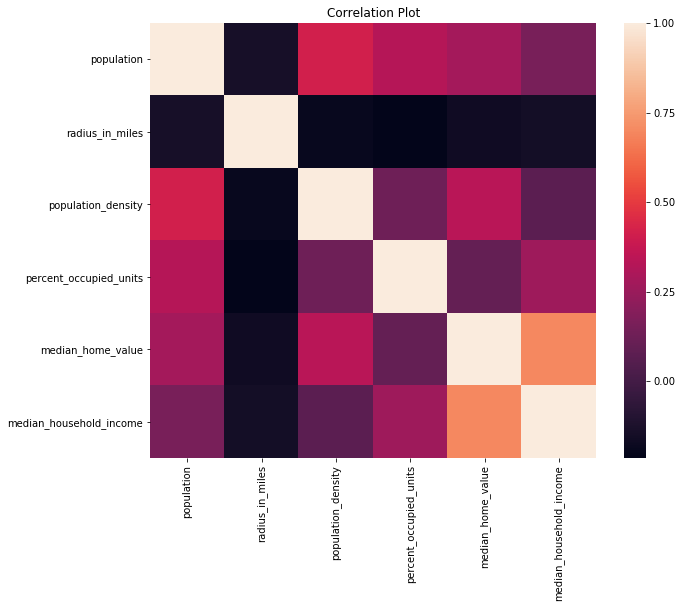

In [16]:
plt.figure(figsize=(10,8))
plt.title('Correlation Plot')
sns.heatmap(df_merged[['population','radius_in_miles', 'population_density', 'percent_occupied_units',
           'median_home_value','median_household_income']].corr())

* As we see from the above correlation matrix, population and population densities are not as highly correlated as we would have expected; population has a correlation value of 0.4 with population_density and 0.32 with percent_occupied_units.


* Median home value has highest correlation value of 0.7 with median household income and 0.33 with population_density, which indicates zipcodes with high density population, high median home value and high income (such as Financial districts, IT parks and so on).

In [17]:
df_prepped = df_merged[['zipcode','population','radius_in_miles', 'population_density', 'percent_occupied_units',
           'median_home_value','median_household_income']]

## Clustering

* With the prepped data, we can recognize strong patterns (if they exist), and see if zipcodes can form distinct clusters, which signify some specific characteristics. Before we run any clustering algorithm, we need to normalize or standardize our dataset.


* Why standardize or normalize each feature ? In Clustering methods, we use distance metrics between points, and not having variables on same scale can lead to variable with larger range being more dominant than other features. 


* By Min-Max scaling, the underlying distribution does not change, however, all the values are scaled from 0-1, which is also computationally easier to calculate.

In [18]:
df_prepped.head()

,zipcode,population,radius_in_miles,population_density,percent_occupied_units,median_home_value,median_household_income
0,60629,113916,2.0,16726.0,0.885706,159700.0,40650.0
1,79936,111086,6.0,4154.0,0.969851,121700.0,52024.0
2,11368,109931,1.0,41768.0,0.931661,480900.0,45964.0
3,90650,105549,2.0,10761.0,0.966065,315500.0,60770.0
4,90011,103892,2.0,24240.0,0.941436,269300.0,30171.0


* Below, we import MinMax Scaler from sklearn preprcessing package, and transform the dataset into df_scaled

In [19]:
# importing necessary package

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# fit and transforming into new dataframe
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_prepped[['population', 'radius_in_miles', 'population_density',
        'percent_occupied_units', 'median_home_value',
        'median_household_income']]))

# renaming scaled columns
df_scaled.columns = ['population', 'radius_in_miles', 'population_density',
        'percent_occupied_units', 'median_home_value',
        'median_household_income']

df_scaled.head()

,population,radius_in_miles,population_density,percent_occupied_units,median_home_value,median_household_income
0,1.000000,0.002962,0.116409,0.879561,0.151213,0.154144
1,0.975155,0.009061,0.028911,0.968230,0.112829,0.200099
2,0.965015,0.001438,0.290695,0.927987,0.475657,0.175615
3,0.926545,0.002962,0.074894,0.964240,0.308586,0.235436
4,0.911998,0.002962,0.168705,0.938288,0.261920,0.111805


* Now, we pivot and take a deeper look into what Clustering methods have to offer and how we can potentially find segments using various unsupervised algorithms. Later, we will retract back to the data we prepped for the New Business and try to apply these algorithms in practice.

<hr>

<a id='4'></a>

## Clustering Techniques

* Generally, clustering algorithms can be split into two: <strong> Hierarchical </strong> & <strong> Non-hierarchical </strong> Clustering methods. As Clusters do not have pre-set labels or do not belong to any class, all clustering methods fall under larger bracket of Unsupervised learning methods.


* Based on the underlying data-distributions, few algorithms outperform others; which means there is no generalizable algorithm which works best all the time. Hence, clustering needs lots of visualizations and data-preprocessing (Sometime PCA or other dimensionality reduction techniques), to reach best conclusions.


* To better understand the most used Clustering algorithms, we can look at [Scikit Clustering documentation](https://scikit-learn.org/stable/modules/clustering.html), which includes Algorithms & Evaluation metrics.

## K-Means

* To kick things off, lets us start by looking at <strong> K-Means clustering</strong>, where we start with an initial value of k (which denotes # of clusters, arbitrary) in nature. Starting with k (pre-fixed) number of clusters centres, each point is initially assigned to the nearest cluster centre. After assigning them, cluster centres are calculated (Note: No data point needs to exist at the cluster centre). Once again, each point is assigned a cluster centre and the process repeats. We can effectively stop the loop until the Sum of Squared distance across all clusters does not decrease (within clusters sum of squared distances).


* We can see how the initial value of k matters a lot, and needs to be decided before hand (at least an estimate). We can also leverage the elbow plot, to decide on number of clusters we want to form using the underlying data. Similarly, we can also use K-medians and K-modes clustering algorithms. 


* As expected, the starting cluster centres being random, can provide different results each time, which is why we use k-means ++ in most implementations, which initializes k's far from each other, which gives us more reliable results.


* When does K-means work and when does it not ? K-means does not take density or number of points around each data-point into consideration, it only calculates the Eucledian Distance and tries to minimize Sum of squared distance within clusters. Also, the shape of underlying data distribution are not taken into consideration, which is crucial to understand in many cases. Let us plot two datasets and see if K-means performs well on them.

/Users/aditya.kalidindi/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


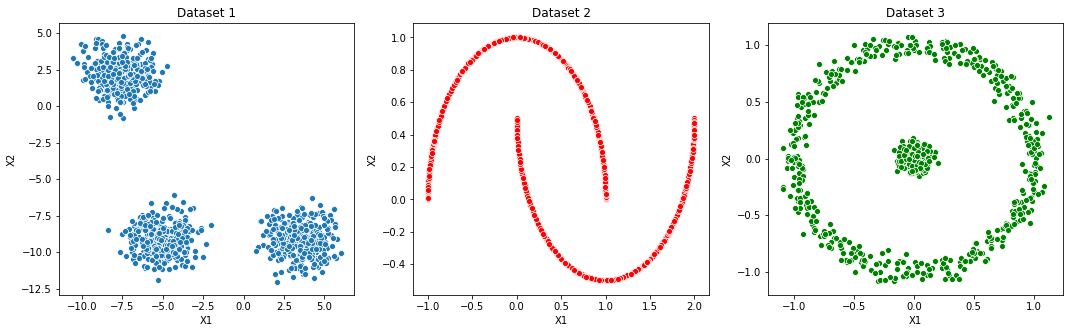

In [20]:
# importing datasets (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles

X1, X2 = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=41)
dataset1 = pd.DataFrame(X1, X2, columns=['X1', 'X2'])

X1, X2 = make_moons(n_samples=1000, random_state=41)
dataset2 = pd.DataFrame(X1, X2, columns=['X1', 'X2'])

X1, X2 = make_circles(n_samples=1000, factor=.05, noise=.05, random_state=41)
dataset3 = pd.DataFrame(X1, X2, columns=['X1', 'X2'])

# let us visualize the three generated datasets
plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
plt.title('Dataset 1')
sns.scatterplot(x='X1', y='X2', data=dataset1)

plt.subplot(1, 3, 2)
plt.title('Dataset 2')
sns.scatterplot(x='X1', y='X2', data=dataset2, color='r')

plt.subplot(1, 3, 3)
plt.title('Dataset 3')
sns.scatterplot(x='X1', y='X2', data=dataset3, color='g')

* Let us implement K-means on all three datasets. All three datasets have 2 features only (X1 and X2), and we can visually confirm that dataset-1 has 3 distinct clusters, dataset-2 and dataset-3 have 2 distinct clusters. Hence, we can start by assigning k as 3, 2 and 2 respectively. 

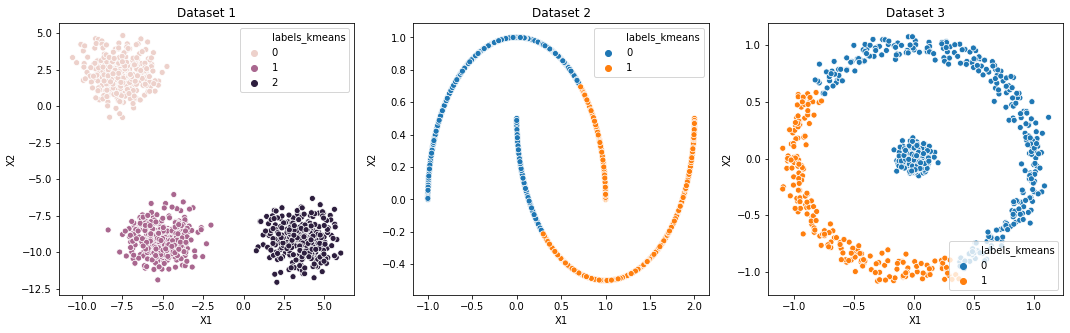

In [21]:
from sklearn.cluster import KMeans

# assigned cluster numbers 
k_dataset_1 = 3
k_dataset_2 = 2
k_dataset_3 = 2

# instantiated 3 Kmeans models and fit datasets
kmeans_model1 = KMeans(n_clusters = k_dataset_1, init='k-means++', random_state=41).fit(dataset1)
kmeans_model2 = KMeans(n_clusters = k_dataset_2, init='k-means++', random_state=41).fit(dataset2)
kmeans_model3 = KMeans(n_clusters = k_dataset_3, init='k-means++', random_state=41).fit(dataset3)

# assign labels back to the original dataset
dataset1['labels_kmeans'] = kmeans_model1.labels_
dataset2['labels_kmeans'] = kmeans_model2.labels_
dataset3['labels_kmeans'] = kmeans_model3.labels_

# now, we visualize the results with cluster labels
plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
plt.title('Dataset 1')
sns.scatterplot(x='X1', y='X2', data=dataset1, hue='labels_kmeans')

plt.subplot(1, 3, 2)
plt.title('Dataset 2')
sns.scatterplot(x='X1', y='X2', data=dataset2, hue='labels_kmeans')

plt.subplot(1, 3, 3)
plt.title('Dataset 3')
sns.scatterplot(x='X1', y='X2', data=dataset3, hue='labels_kmeans')

<a id='5'></a>

* Clearly, we see that Dataset-1 forms 3 distinct clusters and works perfectly, however, Dataset 2 and 3 do not perform well, due to the fact that they have distinct data distributions (Dataset 2 has 2 'U' shaped arcs formed, Dataset 3 has two circles, one covering the other with higher diameter but same center).


* To solve the problem faced by dataset 2 and 3, let us take a look at <strong> DBSCAN (Density based spatial Clustering of Applications with Noise)</strong>.

## DBSCAN Algorithm

* DBSCAN algorithm takes density of data-points into consideration, and forms clusters where high density of points are close to each other in high-dimensional space. Hence, cluster can take any shape or form purely taking density into consideration.


* Intuitively speaking, clustering can be thought as follows: Say people are spread in different stalls in a carnival. The food stall has a long line, with a lot of people (high density), with less distance between them. Say there is a band playing nearby, and people surround the band (forming a curcular shaped cluster), and some people scattered all over the place.


* DBSCAN takes two parameters into consideration, the number of <strong>minimum samples</strong> to form a cluster if other points fall within maximum distance <strong> eps</strong>. Noisy samples are alloted cluster label of -1, which means they do not belong to any cluster. Hence, DBSCAN does not need an initial number of clusters as it looks to form clusters across all points and either adds it to the neighborhood clusters or assigns it as noise. Let us try DBSCAN for the above datasets.

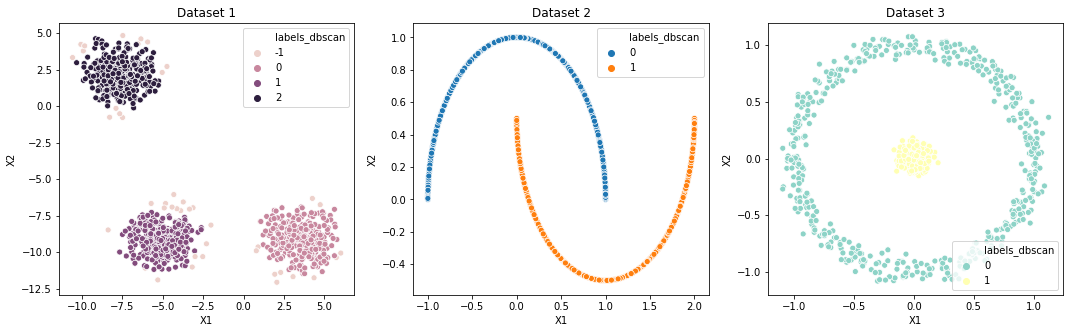

In [22]:
from sklearn.cluster import DBSCAN

# instantiated 3 DBSCAN models and fit datasets
dbscan_model1 = DBSCAN(eps=0.5, min_samples=5).fit(dataset1[['X1', 'X2']])
dbscan_model2 = DBSCAN(eps=0.5, min_samples=5).fit(dataset2[['X1', 'X2']])
dbscan_model3 = DBSCAN(eps=0.5, min_samples=5).fit(dataset3[['X1', 'X2']])

# assign labels back to the original dataset
dataset1['labels_dbscan'] = dbscan_model1.labels_
dataset2['labels_dbscan'] = dbscan_model2.labels_
dataset3['labels_dbscan'] = dbscan_model3.labels_

# now, we visualize the results with cluster labels
plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
plt.title('Dataset 1')
sns.scatterplot(x='X1', y='X2', data=dataset1, hue='labels_dbscan')

plt.subplot(1, 3, 2)
plt.title('Dataset 2')
sns.scatterplot(x='X1', y='X2', data=dataset2, hue='labels_dbscan')

plt.subplot(1, 3, 3)
plt.title('Dataset 3')
sns.scatterplot(x='X1', y='X2', data=dataset3, hue='labels_dbscan', palette='Set3')


* From the above plots, we see that Dataset-1 in case of DBSCAN can easily detect the 'outliers' according to the algoritms, when compared to K-means plot, which did not have any outlier cluster, hence, DBSCAN gave us 3 clusters and 1 outlier cluster (We can prefer either Kmeans or DBSCAN for this dataset).


* For dataset 2 we see that it forms 2 clusters naturally (with default parameters), when compared to the 2 which could not perfectly detect the arcs. For dataset 3, we observe that DBSCAN fits perfectly, as it is able to differentiate between centre circle and outer circle.


<a id='6'></a>

## Clustering Metrics


* Before we go ahead with other clustering algorithms, let us pivot into understanding the quality of clusters provided by each of these algorithms. As the number of dimensions increase, visually inspecting them (as we did above ) is not practical. Generally, there are two standard metrics which are used in Industry, firstly <strong>Log-Likelihood</strong> if the cluster assignment is probabilistic, and [Silhouette](https://en.wikipedia.org/wiki/Silhouette_%28clustering%29) metric.


* All clustering methods in general try to reduce (minimize) some sort of distance (either distance between point and cluster center), increase density within given distance eps, which tends to reduce the total sum of squared distance from point to cluster center in case of Euclidean distance, or Manhattan distance (L1 form) or some other deistance metric.


* The [Silhouette](https://en.wikipedia.org/wiki/Silhouette_%28clustering%29) metric as stated, ranging from -1 to +1, essentially calculating how similar a data-point is to its cluster and how dissimilar it is to other clusters. Hencem having a higher value indicates 'tightness' within cluster and higher 'separation' from other clusters. Hence, Silhouette distance can be used as a metric to choose number of cluster centers for algorithms which need to have predefined k. Let us look at a small exmaple to see the formal implementation of silhouette metric for example dataset1.

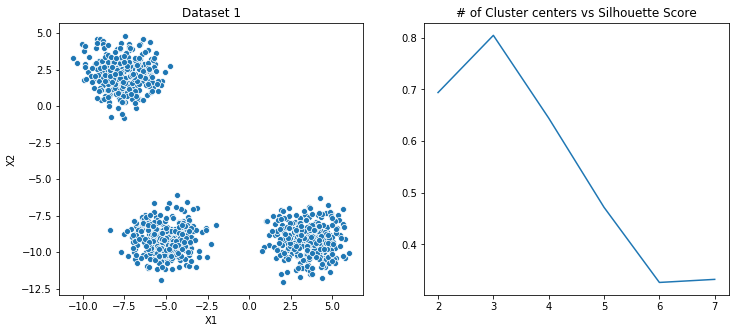

In [23]:
# importing silhouette score
from sklearn.metrics import silhouette_score

# plotting dataset1
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Dataset 1')
sns.scatterplot(x='X1', y='X2', data=dataset1[['X1', 'X2']])

#looping over differetn range of number of cluster centres
scores = []
for num_cluster in range(2,8):
    kmeans_silhouette = KMeans(n_clusters=num_cluster)
    kmeans_fit = kmeans_silhouette.fit(dataset1[['X1', 'X2']])
    labels = kmeans_fit.labels_

    score = silhouette_score(dataset1[['X1', 'X2']], labels)
    scores.append(score)
    
plt.subplot(1, 2, 2)
plt.title('# of Cluster centers vs Silhouette Score')
plt.plot(np.arange(2,8), scores)

* We clearly see that silhouette score peaks at 3 clusters, which we can visually confirm. Let us take a look at the mathematical formulation of the metric. According to the [official sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html), 'The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.'


* Let us break down the above statement into simpler terms, to understand what the score conveys. For each point in each cluster, a is the mean distance between the point and all other points in its cluster. Hence, smaller the value of a, better is the assignment (closeness or tightness of a cluster). Now, for each point in each cluster, we calculate the distance of the data-point to all points of the nearest cluster (see how far we are to the closest neighboring cluster). The coefficient is calculated as (b-a)/ max(a, b), where numerator is the difference of b and a, and denominator is the maximum of a,b; which scales it from -1 to +1, which any value less than 0 indicates wrong assignment of cluster center.

<a id='7'></a>

## Hierarchical Clustering 

* As the name suggests, Hierarcial clustering starts by assigning data-points into a cluster, and based on the chosen distance metric (Eulcidean, Manhattan) or any distance metric, starts to add more data-points into the cluster. There are two ways to approach Hierarchial clustering, either top-down approach or bottom-up approach, namely <strong>Divisive</strong> (Start with complete dataset, break down into smaller cluster), or <strong>Agglomerative</strong> (start with single point, keep adding new points as cluster size increases). 


* Let us take a look at the [scikit Agglomerative documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering), which has the linkage attribute to play with; the options are as follows:

<strong>linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)</strong>

From [here](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering), we see the following options to tweak for based on the underlying data distributions; The linkage parameter can clearly help separate clusters for different shapes as implemented [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html)

* Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.


* Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.


* Average linkage minimizes the average of the distances between all observations of pairs of clusters.


* Single linkage minimizes the distance between the closest observations of pairs of clusters.

<hr>

* Dendograms are often used to visuaize and convey where clusters combine together, to form single cluster, or how the whole dataset splits further into many clusters. From [here](https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py), we use a dendogram to visualize our dataset1.

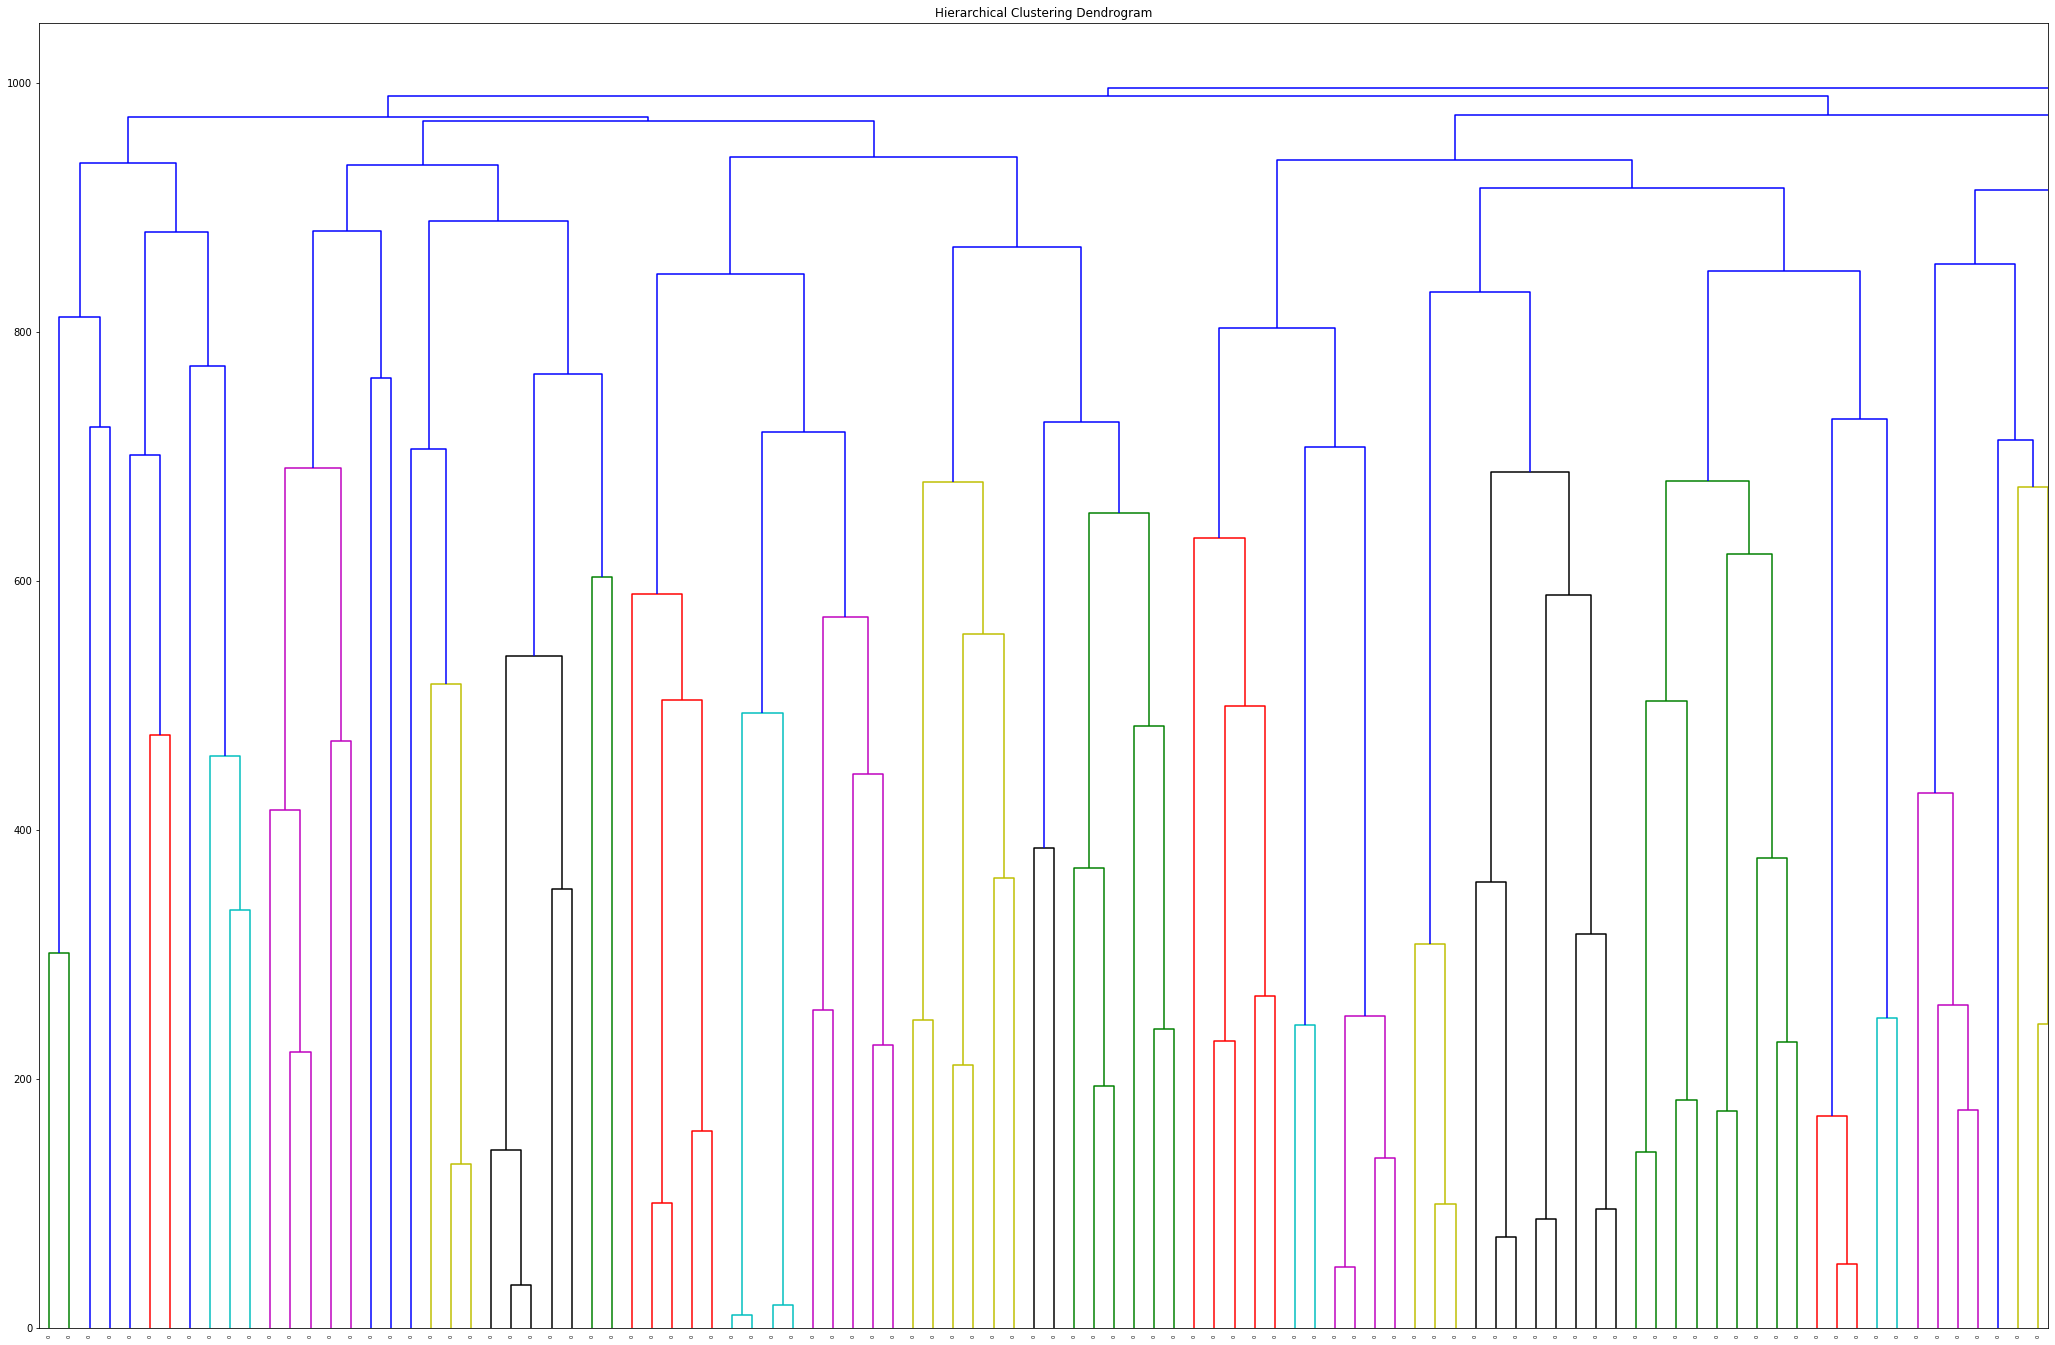

In [24]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(n_clusters=3)

model = model.fit(dataset1[['X1','X2']])
plt.figure(figsize=(36,24))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)
plt.xlim(0,1000)
plt.show()

* As we see from the above dendogram (Full dendogram not shown), we can see how different points start at the bottom, start clustering together, initially, there are same number of clusters as the number of data points, and starts combining closest data points into clusters. As we go up the Y-axis, we see tht we have 1 cluster in the end. Hence, we can use y-axis as a cutoff, to see the number of clusters we need. 

<a id='8'></a>

* Till now, all the algorithms we saw are hard assigners, and not probabilistic in nature. <strong>There is not direct effort put into trying to match/ best fit the cluster shape to the underlying data distribution (which does happen sometimes, but objective function is generally different; For example, DBSCAN does a good job in fitting different shaped clusters, but inherently does not try to maximize fit of data-distribution to cluster shape).</strong>

## Log-Loss & EM Algorithm

* Hence, we use Gaussian Mixture Model, which does soft assignment of clusters (probabilities of belonging to each cluster), and tries to fit Gaussian forms to the underlying data. It uses <strong>EM (Expectation Maximization)</strong> to achieve probabilistic outputs. We need to understand how Log-Loss is used as an evaluation metric when it comes to probabilistic models.


* For hard-assignment/ classification tasks, one commonly used metric is <strong>Accuracy</strong> of a model, which can be tuned based on classification threshold (by default, if probability of new data vector is >=0.5, it is assigned label 1, else label 0, in case on Binary Classification). Penalization in this case does not change by the probability itself. For example, say we have two False Negatives (actually class 1, but we predict it as class 0 with probabilities 0.1 and 0.4), as shown in the plot below.

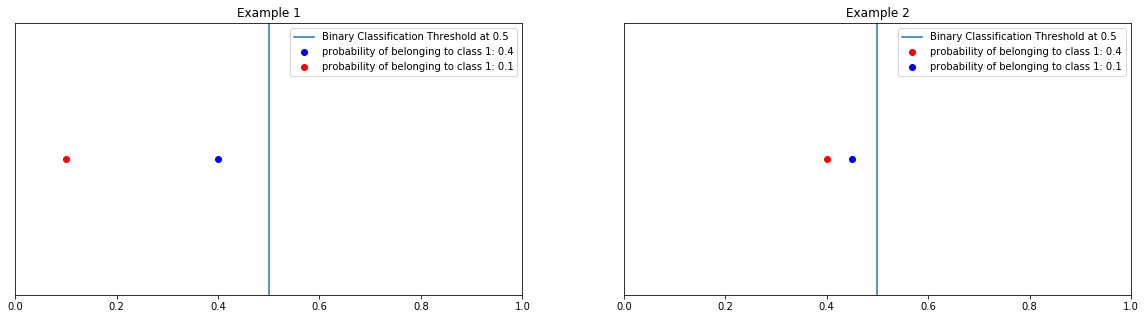

In [25]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)

plt.scatter(0.4, 0, label='probability of belonging to class 1: 0.4',c='b')
plt.scatter(0.1, 0, label='probability of belonging to class 1: 0.1',c='r')
plt.axvline(x=0.5, label='Binary Classification Threshold at 0.5')
plt.legend()
plt.xlim(0,1)
plt.yticks([])
plt.title("Example 1")


plt.subplot(1, 2, 2)
plt.scatter(0.4, 0, label='probability of belonging to class 1: 0.4',c='r')
plt.scatter(0.45, 0, label='probability of belonging to class 1: 0.1',c='b')
plt.axvline(x=0.5, label='Binary Classification Threshold at 0.5')
plt.legend()
plt.xlim(0,1)
plt.yticks([])
plt.title("Example 2")

plt.show()

* In Examples 1 and 2, both the points are requally contributing towards final accuracy of the binary classification task. However, we need an optimization function, which could penalize the red points heavily, when compared to the blue points.


* To do so, we can use Log-Loss, as it takes into account how correct or wrong the prediction is as well, along with whether the prediction was correct or wrong as well (accounts power of prediction). Instead of accuracy, let us calculate Log-loss for the above case. For Binary classification, Logg loss is as follows:   <b>-y(log(p)) - (1-y)log(1-p)</b>.


* We calculate Log-Loss for both examples, under the assumptions that predicted class is 1, but actual class is 0. We also have the probabilities of belonging to class 1 (point1_p, point2_p). We observe that as closer we are towards 1, lesser the Log-Loss, and further away from the actual predicted class, higher the Log-Loss. <strong>Hence, example 1 is heavily penalized even though accurcies are same !</strong>

In [26]:
y = 1
point1_p = 0.1
point2_p = 0.4

LL_point1 = -(y*(np.log2(point1_p)))-(1-y)*np.log2(1-point1_p)
LL_point2 = -(y*(np.log2(point2_p)))-(1-y)*np.log2(1-point2_p)

LL = LL_point1 + LL_point2
print("Example 1, Log-Loss :", LL)


y = 1
point1_p = 0.4
point2_p = 0.45

LL_point1 = -(y*(np.log2(point1_p)))-(1-y)*np.log2(1-point1_p)
LL_point2 = -(y*(np.log2(point2_p)))-(1-y)*np.log2(1-point2_p)

LL = LL_point1 + LL_point2
print("Example 2, Log-Loss :", LL)

Example 1, Log-Loss : 4.643856189774724
Example 2, Log-Loss : 2.473931188332412


* Let us look at Log-Loss with predicted class 1, and probability of belong to class 1 is extremely high (Lets say 0.98 and 0.99). We see how Log-Loss reaches almost 0, describing its predictive nature to detect class 1.

In [27]:
y = 1
point1_p = 0.98
point2_p = 0.99

LL_point1 = -(y*(np.log2(point1_p)))-(1-y)*np.log2(1-point1_p)
LL_point2 = -(y*(np.log2(point2_p)))-(1-y)*np.log2(1-point2_p)

LL = LL_point1 + LL_point2
print("Example 3, Log-Loss :", LL)

Example 3, Log-Loss : 0.043645915354631595


<a id='9'></a>

## Gaussian Mixture Model

* Lets take a look at EM algorithm through Gaussian Mixture Models; for GMM, my primary source of reference is an excellent resource which can be found [here](http://ethen8181.github.io/machine-learning/clustering/GMM/GMM.html). To simply put, GMM assumes that the underlying data can is generated from Gaussian distributions of different 'shapes'; However, we need to find the parameters mu (mean) and sigma (spread) of each of these Gaussians. As we iterate through the Expectation and Maximization steps, we become more confident about the cluster assignments (which are soft probabilities); Hence, reducing the Log-Loss defined above.


* First, let us lok at three Gaussian distributions along the X-axis, with different means and variances, and has a generalized form of $$X \sim \mathcal{N}(\mu,\sigma^{2})\$$ 

where $\mu, \sigma$, are the mean and standard deviations respectively.

(0, 12)

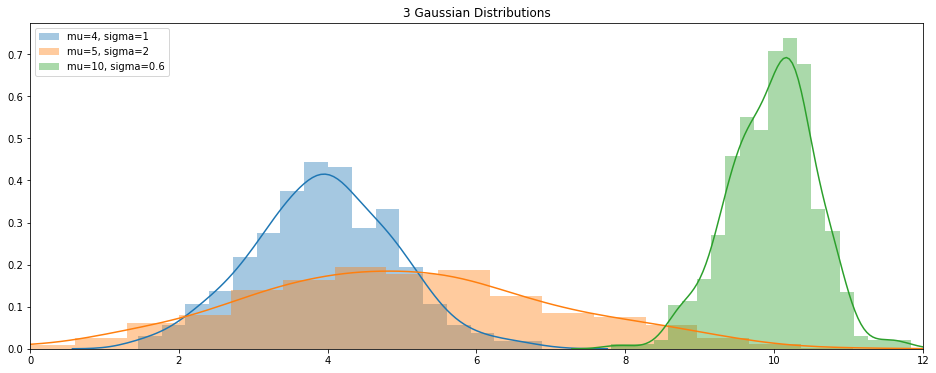

In [28]:
# using scipy norm to generate 3 gaussian datasets
from scipy.stats import norm

gaussain1 = norm.rvs(4,1,500)
gaussain2 = norm.rvs(5,2,500)
gaussain3 = norm.rvs(10,0.6,500)

plt.figure(figsize=(16,6))

sns.distplot(gaussain1, label='mu=4, sigma=1')
sns.distplot(gaussain2, label='mu=5, sigma=2')
sns.distplot(gaussain3, label='mu=10, sigma=0.6')

plt.legend()
plt.title('3 Gaussian Distributions')
plt.xlim(0,12)

* In our example datasets 1,2 and 3, we have two dimensions (X1, X2), Hence, let us implement Gaussian Mixture Model for [Multivariate Gaussian Distributions](https://en.wikipedia.org/wiki/Multivariate_normal_distribution). Now, let us use scipy to generate multivariate gaussian data (Source: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html)

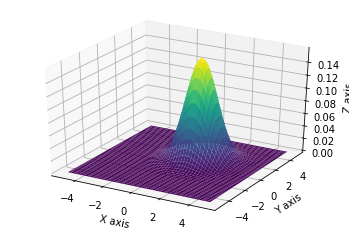

In [29]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook

mean = [1,1]
cov = [[1,0],[0,1]]

x = np.linspace(-5,5,500)
y = np.linspace(-5,5,500)

X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mean[0], mean[1]], [[cov[0][0], cov[0][1]], [cov[1][0], cov[1][1]]])

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

* For Multivariate Gaussian distributions, the shape is defined by the means of both the distributions (on either axes), and the covariance matrix (instead of variance/ standard deviation), due to increased number of axes. Below are the most general shapes; sklearn has parameters for covariance type:

covariance_type : {‘full’ (default), ‘tied’, ‘diag’, ‘spherical’}
String describing the type of covariance parameters to use. Must be one of:

‘full’
each component has its own general covariance matrix

‘tied’
all components share the same general covariance matrix

‘diag’
each component has its own diagonal covariance matrix

‘spherical’
each component has its own single variance

See documentation for further details: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html

* Next, we are going to explore few different covariance types and see how the shapes for multivariate gaussians change. In the first case, the covariance is [1,0], [0,1], which is the identity matrix, resulting in spherical density plot. In case of diagonal plot, the covariacne is [1,0], [0,3], hence scaling second axis 3 times the coefficient of first axis. 

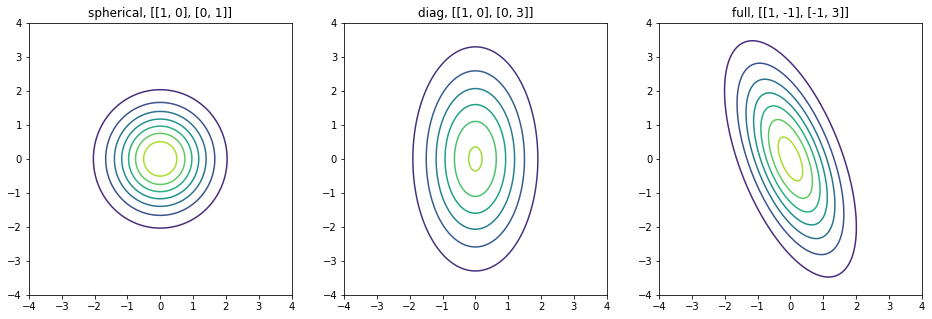

In [30]:
# directly from http://ethen8181.github.io/machine-learning/clustering/GMM/GMM.html
x, y = np.mgrid[-4:4:.01, -4:4:.01]
position = np.empty(x.shape + (2,))
position[:, :, 0] = x
position[:, :, 1] = y

# different values for the covariance matrix
covariances = [ [[1, 0], [0, 1]], [[1, 0], [0, 3]], [[1, -1], [-1, 3]] ]
titles = ['spherical', 'diag', 'full']

plt.figure(figsize = (16, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    z = multivariate_normal([0, 0], covariances[i]).pdf(position)
    plt.contour(x, y, z)
    plt.title('{}, {}'.format(titles[i], covariances[i]))
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])

plt.show()

* If the above density plots could be thought of as a data generative process, we see that by changing the means and covariance matrix, we can achieve different shapes along different directions (following gaussian form; hence not too robust). 

* Now that we have a good understanding of various clustering algorithms, we can look at our prepped dataset and see how we might potentially find zipcode which represent important characteristics of where our potential customers could reside.

<a id='11'></a>

## Applying different Clustering Algorithms to Zipcode Dataset

In [31]:
df_scaled.head(2)

,population,radius_in_miles,population_density,percent_occupied_units,median_home_value,median_household_income
0,1.000000,0.002962,0.116409,0.879561,0.151213,0.154144
1,0.975155,0.009061,0.028911,0.968230,0.112829,0.200099


In [32]:
df_prepped.head(2)

,zipcode,population,radius_in_miles,population_density,percent_occupied_units,median_home_value,median_household_income
0,60629,113916,2.0,16726.0,0.885706,159700.0,40650.0
1,79936,111086,6.0,4154.0,0.969851,121700.0,52024.0


<Figure size 576x576 with 0 Axes>

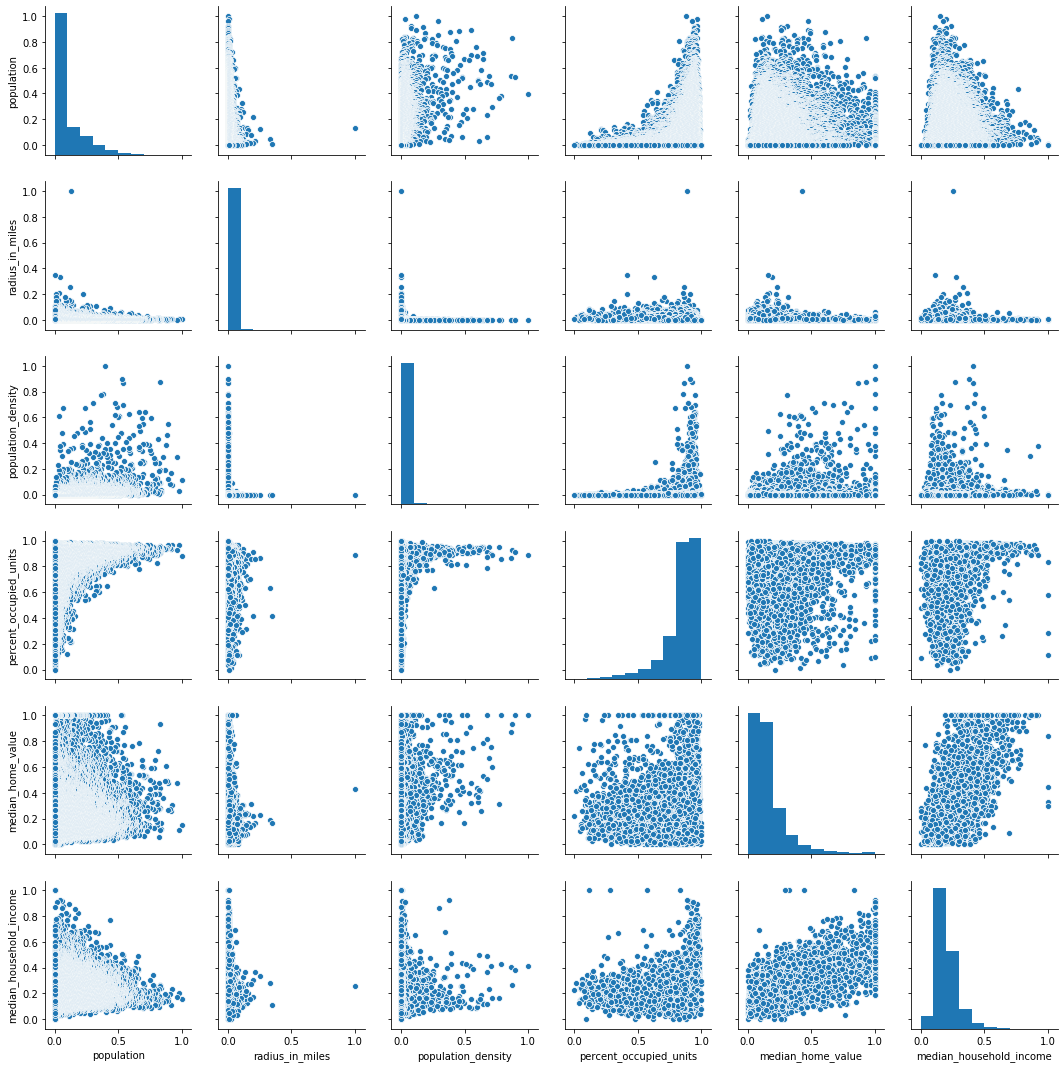

In [33]:
# we use sns pairplots to see all attribute relationships

plt.figure(figsize=(8,8))
sns.pairplot(data=df_scaled)

plt.show()

In [34]:
# importing 4 clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# importing silhouette score metric
from sklearn.metrics import silhouette_score

# importing log loss metric
from sklearn.metrics import log_loss

#### KMeans: Best number of clusters for zipcode dataset

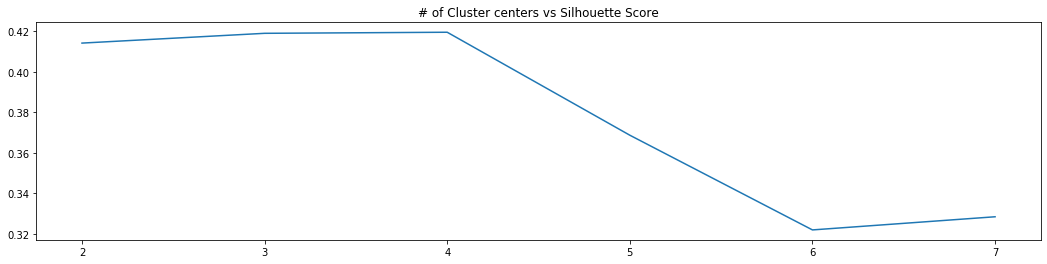

In [35]:
# first, we implement KMeans algorithm, for various k

#looping over different range of number of cluster centres
scores = []
for num_cluster in range(2,8):
    kmeans_silhouette = KMeans(n_clusters=num_cluster)
    kmeans_fit = kmeans_silhouette.fit(df_scaled)
    labels = kmeans_fit.labels_

    score = silhouette_score(df_scaled, labels)
    scores.append(score)

plt.figure(figsize=(18,4))
plt.title('# of Cluster centers vs Silhouette Score')
plt.plot(np.arange(2,8), scores)

* We observe that the Silhouette score is highest for 3-clusters in KMeans from the above graph, Let us feed the labels back into the dataset and apply look at aggregations to see if we find any patterns. Before that, we need to re-apply KMeans with 3 clusters to obtain labels.

In [36]:
# KMeans with 3 cluster centers

kmeans_best = KMeans(n_clusters=3, random_state=2)
kmeans_best_fit = kmeans_best.fit(df_scaled)
df_scaled['kmeans_labels'] = kmeans_best_fit.labels_
df_prepped['kmeans_labels'] = kmeans_best_fit.labels_

# frequency of labels
print(df_scaled.kmeans_labels.value_counts())

# Now, let us take a look at means, after grouping across clusters
df_scaled.groupby('kmeans_labels').mean()

0    19324
1     5970
2     3249
Name: kmeans_labels, dtype: int64


/Users/aditya.kalidindi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,population,radius_in_miles,population_density,percent_occupied_units,median_home_value,median_household_income
kmeans_labels,,,,,,
0,0.058469,0.013297,0.003551,0.862140,0.109823,0.177324
1,0.247338,0.007993,0.030131,0.922040,0.336489,0.297699
2,0.019879,0.018028,0.001108,0.529666,0.167423,0.178937


In [37]:
# Now, let us take a look at medians, after grouping across clusters
df_scaled.groupby('kmeans_labels').median()

,population,radius_in_miles,population_density,percent_occupied_units,median_home_value,median_household_income
kmeans_labels,,,,,,
0,0.025473,0.012110,0.000369,0.874383,0.097375,0.172637
1,0.236948,0.006011,0.012291,0.935376,0.289697,0.283681
2,0.008832,0.013634,0.000118,0.574439,0.138890,0.169615


### Does this make sense ? 

* Looking at just the mean and median groups, we can conclude that data-points with kmeans_label as 1, is the most populated, with highest population density, most percent occupied units and also highest home value and household incomes ! Note that the radius in miles is the least of all groups, which signifies that these are smaller zipcodes in land area. This is exactly the type of 'typical' cluster of zipcodes where our customers might reside !

### How are clusters 0 and 2 different ?

* Cluster 2 has the least population and population densities, along with highest radius in miles. Cluster 0 is somewhere in between Cluster 1 and Cluster 2; however has least median home value. These clusters are slightly tougher to interpret when compared to cluster 1.


### Visual Inspection

* We can confirm the same from plots below, which show higher population and population densities for Cluster 1, and lesser radius in miles which shows that zipcodes in this segment are 'tighly' bound areas all over the US; and our <strong> Ideal</strong> Segment.

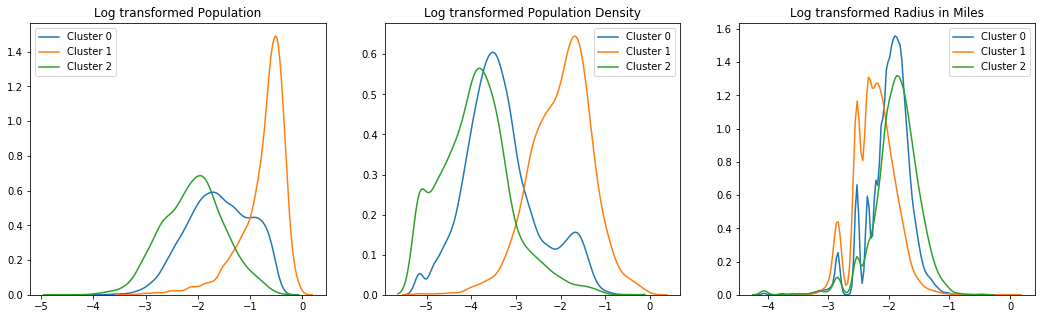

In [38]:
plt.figure(figsize=(18,5))
np.seterr(divide = 'ignore') 
plt.subplot(1, 3, 1)

plt.title('Log transformed Population')
sns.kdeplot(data=np.log10(df_scaled[df_scaled.kmeans_labels == 0].population), label='Cluster 0')
sns.kdeplot(data=np.log10(df_scaled[df_scaled.kmeans_labels == 1].population), label='Cluster 1')
sns.kdeplot(data=np.log10(df_scaled[df_scaled.kmeans_labels == 2].population), label='Cluster 2')

plt.subplot(1, 3, 2)

plt.title('Log transformed Population Density')
sns.kdeplot(data=np.log10(df_scaled[df_scaled.kmeans_labels == 0].population_density), label='Cluster 0')
sns.kdeplot(data=np.log10(df_scaled[df_scaled.kmeans_labels == 1].population_density), label='Cluster 1')
sns.kdeplot(data=np.log10(df_scaled[df_scaled.kmeans_labels == 2].population_density), label='Cluster 2')

plt.subplot(1, 3, 3)

plt.title('Log transformed Radius in Miles')
sns.kdeplot(data=np.log10(df_scaled[df_scaled.kmeans_labels == 0].radius_in_miles), label='Cluster 0')
sns.kdeplot(data=np.log10(df_scaled[df_scaled.kmeans_labels == 1].radius_in_miles), label='Cluster 1')
sns.kdeplot(data=np.log10(df_scaled[df_scaled.kmeans_labels == 2].radius_in_miles), label='Cluster 2')

plt.legend()
plt.show()

In [39]:
df_scaled.columns[:-1]

Index(['population', 'radius_in_miles', 'population_density',
       'percent_occupied_units', 'median_home_value',
       'median_household_income'],
      dtype='object')

#### DBSCAN Algorithm implementation for range of eps

* Before we go ahead and implement DBSCAN; we need to figure out if applying Density Based Algorithm makes sense in this scenario. Revisiting the pair plot above, we see that there are no dense blobs or any sepcific shape that any of our variables follow; Hence, DBSCAN maynot provide additional results. Either way, lets give it a try:

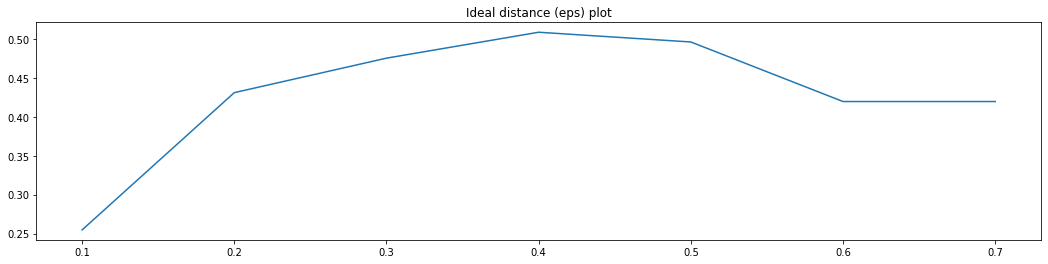

In [40]:
# we implement DBSCAN algorithm, for various components

#looping over different range of number of cluster centres
scores = []

for eps_ in np.arange(0.1, 0.8, 0.1):
    DBSCAN_silhouette = DBSCAN(eps=eps_)
    DBSCAN_fit = DBSCAN_silhouette.fit(df_scaled[['population', 'radius_in_miles', 'population_density',
       'percent_occupied_units', 'median_home_value',
       'median_household_income']])
    
    labels = DBSCAN_fit.labels_

    score = silhouette_score(df_scaled, labels)
    scores.append(score)

plt.figure(figsize=(18,4))
plt.title('Ideal distance (eps) plot')
plt.plot(np.arange(0.1, 0.8, 0.1), scores)

In [41]:
# DBSCAN best with eps as 0.4

DBSCAN_best = DBSCAN(eps=0.4, min_samples=10, metric='manhattan')
DBSCAN_best_fit = DBSCAN_best.fit(df_scaled[['population', 'radius_in_miles', 'population_density',
       'percent_occupied_units', 'median_home_value',
       'median_household_income']])

df_scaled['dbscan_labels'] = DBSCAN_best_fit.labels_

# frequency of labels
print(df_scaled.dbscan_labels.value_counts())

# Now, let us take a look at means, after grouping across clusters
df_scaled.groupby('dbscan_labels').mean()

 0    28522
-1       21
Name: dbscan_labels, dtype: int64


,population,radius_in_miles,population_density,percent_occupied_units,median_home_value,median_household_income,kmeans_labels
dbscan_labels,,,,,,,
-1,0.284836,0.049163,0.529081,0.808325,0.733598,0.502024,1.095238
0,0.093439,0.012700,0.008449,0.836844,0.163369,0.202465,0.436330


In [42]:
# Now, let us take a look at medians, after grouping across clusters
df_scaled.groupby('dbscan_labels').median()

,population,radius_in_miles,population_density,percent_occupied_units,median_home_value,median_household_income,kmeans_labels
dbscan_labels,,,,,,,
-1,0.279395,0.001299,0.673636,0.886983,0.784848,0.412679,1
0,0.034173,0.010585,0.000522,0.879193,0.118789,0.184912,0


* We see that DBSCAN results one mega-cluster and a secondary (outlier) cluster, with 21 zipcodes in the outlier cluster. Clearly, any other Density based or linkage based algorithm would not provide additional results, when compared to Kmeans.


* Similarly, none of our attributes have/ generated from Gaussian distributions; Hence, we can choose zipcodes from segment/ cluster-1 from Kmeans implementation. Below are the number of zipcodes within each of the clusters, along with cluster means and medians.

In [43]:
df_scaled.kmeans_labels.value_counts()

0    19324
1     5970
2     3249
Name: kmeans_labels, dtype: int64

In [44]:
df_scaled.groupby('kmeans_labels').mean()

,population,radius_in_miles,population_density,percent_occupied_units,median_home_value,median_household_income,dbscan_labels
kmeans_labels,,,,,,,
0,0.058469,0.013297,0.003551,0.862140,0.109823,0.177324,0.000000
1,0.247338,0.007993,0.030131,0.922040,0.336489,0.297699,-0.003183
2,0.019879,0.018028,0.001108,0.529666,0.167423,0.178937,-0.000616


In [45]:
df_scaled.groupby('kmeans_labels').median()

,population,radius_in_miles,population_density,percent_occupied_units,median_home_value,median_household_income,dbscan_labels
kmeans_labels,,,,,,,
0,0.025473,0.012110,0.000369,0.874383,0.097375,0.172637,0
1,0.236948,0.006011,0.012291,0.935376,0.289697,0.283681,0
2,0.008832,0.013634,0.000118,0.574439,0.138890,0.169615,0


<a id='12'></a>

## Conclusion 

* Currently, we have 6004 Zipcodes (in Cluster 1), which match our requirements of being highly populated and dense, with higher household income and home value. Now, we can retract these zipcodes back to the original dataset, and see how much percentage of total population within US is within our Cluster of zipcodes.

In [46]:
val = np.round((168858102/(128310948+168858102+7317750)*100),2)
print(f'{val} % of total US population from 21 % of zipcodes')

df_prepped.groupby('kmeans_labels').sum()[['population','radius_in_miles']]

55.46 % of total US population from 21 % of zipcodes


,population,radius_in_miles
kmeans_labels,,
0,128873293,169649.261364
1,168249952,31641.227273
2,7386096,38605.329545


In [47]:
# below is the filtered dataframe with 5988 zipcodes 

df_recommended_zipcodes = df_prepped[df_prepped.kmeans_labels == 1]

df_recommended_zipcodes.head()

,zipcode,population,radius_in_miles,population_density,percent_occupied_units,median_home_value,median_household_income,kmeans_labels
0,60629,113916,2.0,16726.0,0.885706,159700.0,40650.0,1
1,79936,111086,6.0,4154.0,0.969851,121700.0,52024.0,1
2,11368,109931,1.0,41768.0,0.931661,480900.0,45964.0,1
3,90650,105549,2.0,10761.0,0.966065,315500.0,60770.0,1
4,90011,103892,2.0,24240.0,0.941436,269300.0,30171.0,1


* We aggregate back to population and find out that we are targeting around 21 % of all zipcodes in the US, However, that covers 55 % of US population as a whole ! This is exactly the segment we want to target initially, as these zipcodes are highly valuable to us.




<strong> 55 % of total US population from 21 % of zipcodes </strong>



* If the above were done at a DMA level, we would not have found these high-valued zipcodes which are all over the US. Say we are able to target just California, New York and Chicago DMAs (due to limited budget constraints); we would have missed massive number of people from other high value areas. 


* Hence, based on context, we might have to drill down further down to targeting only specific areas of a zipcode, or a specific borough within a city ! Deciding on level of granularity is extremely important and does not have to punch a hole in the marketing budget.


* The zipcodes recommended are a good first cut to start advertising. Different clusters of zipcode might respond differently to different marketing channels. For example: Instagram Ads might be highly effective for specific age range, whereas banner Ads might be effective to a different type of people.


* Website click-stream data can be extremely useful for optimize for higher Click-through-Rate to a high valued page, or we might decide to offer few segments of our customers with special offers. Having more data about customers almost always helps, to understand customsers behavioral and purchasing patterns, which we will look into the next notebook.

In [48]:
df_prepped.to_csv('DataSets/outputs/book1_kmeans.csv', index=False)
df_prepped.to_json('DataSets/outputs/book1_kmeans.json')